In [19]:
# feature: trọng lượng xe
# mức tiêu thụ nhiên liệu

from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn import linear_model
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

df = pd.DataFrame({
    'weight': X['weight'],
    'mpg': y['mpg']
})

df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  398 non-null    int64  
 1   mpg     398 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0


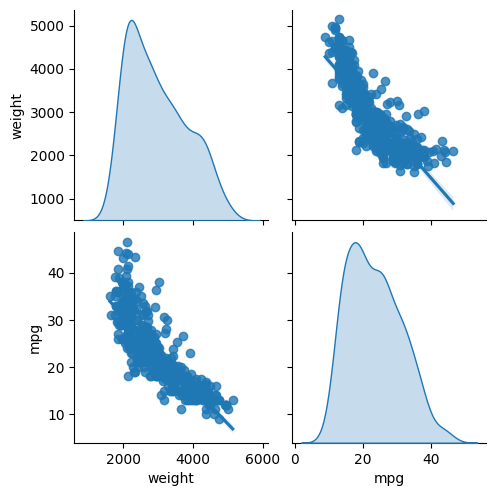

In [20]:
sns.pairplot(df[['weight', 'mpg']], diag_kind='kde', kind='reg')
plt.show()

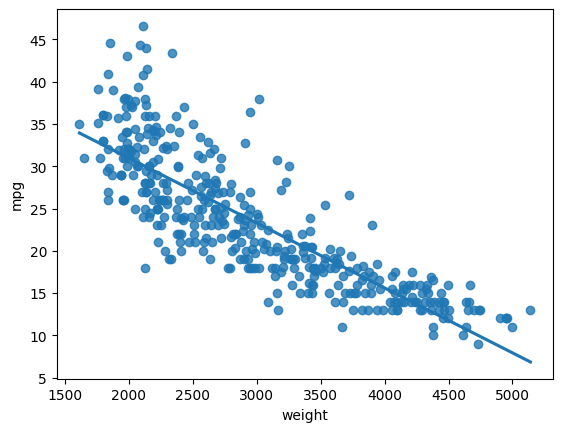

In [21]:
sns.regplot(x=df['weight'], y=df['mpg'], ci=None)
plt.show()

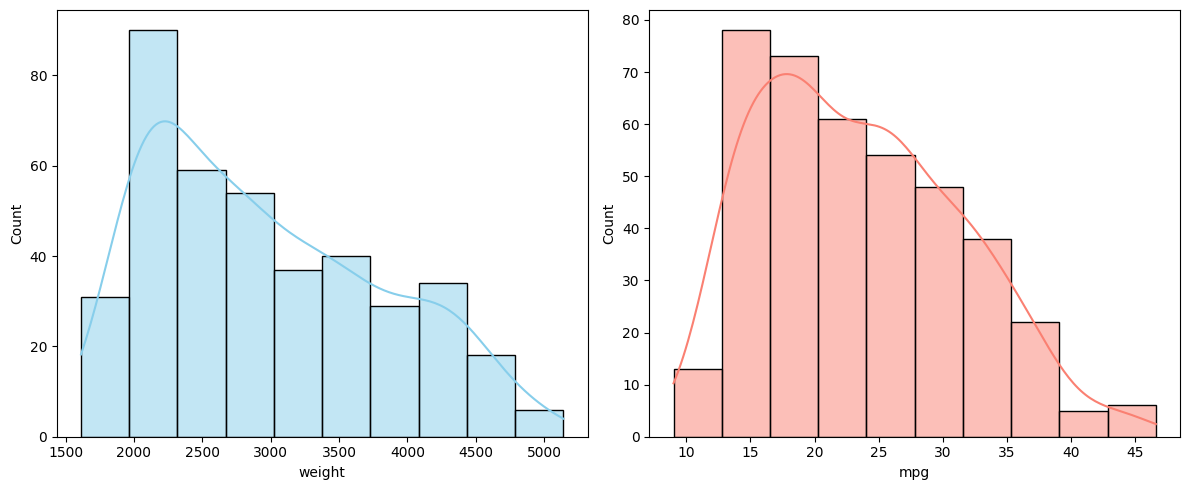

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['weight'], bins=10, kde=True, color='skyblue', ax=axes[0])

sns.histplot(df['mpg'], bins=10, kde=True, color='salmon', ax=axes[1])

plt.tight_layout()
plt.show()

In [23]:
X = df[['weight']].values.astype(float)
y = df[['mpg']].values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


# điểm R square cho thấy mô hình khá tốt trong việc dự đoán. Điểm RMSE cho thấy sai số trung bình giữa các giá trị dự đoán và giá trị thực tế là khoảng 3.86 

Score or R-Squared: 0.722971057303075
Root Mean Squared Error: 3.859386099451077
